### [Learning Rate Schedules and Adaptive Learning Rate Methods for Deep Learning](https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1)

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
from __future__ import print_function
import numpy as np
import math

import matplotlib.pyplot as plt

import keras
from keras import backend as K
from keras.utils import np_utils

from keras.datasets import cifar10

from keras.models import Sequential
from keras.models import model_from_json

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from keras.callbacks import LearningRateScheduler

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


#### Load and prepare CIFAR-10 dataset

In [3]:
BATCH_SIZE = 64
NUM_CLASSES = 2
EPOCHS = 100

Input image dimensions

In [4]:
img_rows, img_cols = 32, 32

Download the dataset

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

For now, we will only consider images of **cats** and **dogs**!

In [6]:
train_picks = np.ravel(np.logical_or(y_train==3, y_train==5))
test_picks = np.ravel(np.logical_or(y_test==3, y_test==5))

In [7]:
y_train = np.array(y_train[train_picks]==5, dtype=int)
y_test = np.array(y_test[test_picks]==5, dtype=int)

In [8]:
X_train = X_train[train_picks]
X_test = X_test[test_picks]

Reshape the data

In [9]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
X_train /= 255
X_test /= 255

In [12]:
print('X_train shape: {}\nTrain samples: {}\nTest samples: {}'.format(X_train.shape, X_train.shape[0], X_test.shape[0]))

X_train shape: (10000, 32, 32, 3)
Train samples: 10000
Test samples: 2000


Convert class vectors to binary class matrices

In [13]:
y_train = keras.utils.to_categorical(np.ravel(y_train), NUM_CLASSES)
y_test = keras.utils.to_categorical(np.ravel(y_test), NUM_CLASSES)

#### Method to build CNN model

In [14]:
def build_cnn(optimizer):
    model = Sequential([
        Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        Conv2D(8, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(16, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax'),
    ])
    
    model.compile(optimizer=optimizer,
                 loss=keras.losses.categorical_crossentropy,
                 metrics=['accuracy'])
    
    return model

#### Method to plot histories

In [15]:
def plot(method, history):
    fig = plt.figure()
    
    plt.plot(range(1, EPOCHS+1), history.history['val_acc'], label='validation')
    plt.plot(range(1, EPOCHS+1), history.history['acc'], label='training')
    plt.legend()
    
    plt.xlim([1, EPOCHS])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    
    plt.title(method.title())
    plt.grid(True)
    plt.show()

#### Method to plot learning rates

In [16]:
def plot_lr(method, loss_history):
    fig = plt.figure()

    plt.plot(range(1, EPOCHS+1), loss_history.lr, label='learning rate')
    plt.legend()

    plt.xlim([1, EPOCHS+1])
    plt.xlabel('Epochs')
    plt.ylabel('Learning rate')

    plt.title('Learning Rate (' + method.title() + ')')
    plt.grid(True)
    plt.show()

#### Constant learning rate

Define SGD optimizer

In [17]:
learning_rate = 0.1
sgd = SGD(lr=learning_rate, momentum=0.0, decay=0.0, nesterov=False)

Build the CNN model

In [18]:
clr_model = build_cnn(sgd)

Fit the model

In [19]:
clr_history = clr_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_data=(X_test, y_test))

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
 - 2s - loss: 0.6930 - acc: 0.5356 - val_loss: 0.6801 - val_acc: 0.5450
Epoch 2/100
 - 2s - loss: 0.6803 - acc: 0.5660 - val_loss: 0.6718 - val_acc: 0.6000
Epoch 3/100
 - 2s - loss: 0.6726 - acc: 0.5885 - val_loss: 0.6816 - val_acc: 0.5545
Epoch 4/100
 - 2s - loss: 0.6667 - acc: 0.6010 - val_loss: 0.6521 - val_acc: 0.6320
Epoch 5/100
 - 2s - loss: 0.6557 - acc: 0.6147 - val_loss: 0.6484 - val_acc: 0.6155
Epoch 6/100
 - 2s - loss: 0.6493 - acc: 0.6209 - val_loss: 0.6356 - val_acc: 0.6465
Epoch 7/100
 - 2s - loss: 0.6402 - acc: 0.6275 - val_loss: 0.6325 - val_acc: 0.6540
Epoch 8/100
 - 2s - loss: 0.6342 - acc: 0.6414 - val_loss: 0.6401 - val_acc: 0.6485
Epoch 9/100
 - 2s - loss: 0.6278 - acc: 0.6486 - val_loss: 0.6178 - val_acc: 0.6585
Epoch 10/100
 - 2s - loss: 0.6189 - acc: 0.6517 - val_loss: 0.6171 - val_acc: 0.6670
Epoch 11/100
 - 2s - loss: 0.6150 - acc: 0.6563 - val_loss: 0.6106 - val_acc: 0.6570
Epoch 12/100
 - 2s - loss

Epoch 97/100
 - 2s - loss: 0.4259 - acc: 0.7840 - val_loss: 0.5857 - val_acc: 0.6965
Epoch 98/100
 - 2s - loss: 0.4184 - acc: 0.7870 - val_loss: 0.5948 - val_acc: 0.7000
Epoch 99/100
 - 2s - loss: 0.4148 - acc: 0.7890 - val_loss: 0.6179 - val_acc: 0.6940
Epoch 100/100
 - 2s - loss: 0.4202 - acc: 0.7826 - val_loss: 0.5939 - val_acc: 0.7015


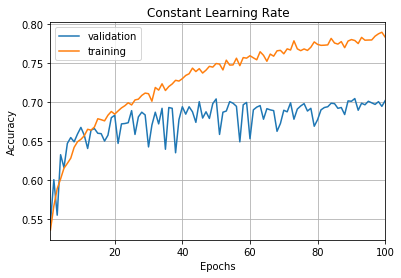

In [20]:
plot('constant learning rate', clr_history)

#### Time-based decay

Define SGD optimizer

In [21]:
learning_rate = 0.1
decay_rate = learning_rate / EPOCHS
momentum = 0.5

In [22]:
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

Build the CNN model

In [23]:
tbd_model = build_cnn(sgd)

Fit the model

In [24]:
tbd_history = tbd_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_data=(X_test, y_test))

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
 - 2s - loss: 0.6940 - acc: 0.4998 - val_loss: 0.6950 - val_acc: 0.5000
Epoch 2/100
 - 2s - loss: 0.6933 - acc: 0.5060 - val_loss: 0.6872 - val_acc: 0.5315
Epoch 3/100
 - 2s - loss: 0.6863 - acc: 0.5420 - val_loss: 0.6690 - val_acc: 0.6125
Epoch 4/100
 - 2s - loss: 0.6729 - acc: 0.5870 - val_loss: 0.6941 - val_acc: 0.5045
Epoch 5/100
 - 2s - loss: 0.6710 - acc: 0.5795 - val_loss: 0.6526 - val_acc: 0.6220
Epoch 6/100
 - 2s - loss: 0.6597 - acc: 0.6049 - val_loss: 0.6429 - val_acc: 0.6255
Epoch 7/100
 - 2s - loss: 0.6503 - acc: 0.6156 - val_loss: 0.6438 - val_acc: 0.6265
Epoch 8/100
 - 2s - loss: 0.6391 - acc: 0.6267 - val_loss: 0.6356 - val_acc: 0.6425
Epoch 9/100
 - 2s - loss: 0.6332 - acc: 0.6334 - val_loss: 0.6265 - val_acc: 0.6465
Epoch 10/100
 - 2s - loss: 0.6327 - acc: 0.6348 - val_loss: 0.6237 - val_acc: 0.6455
Epoch 11/100
 - 2s - loss: 0.6263 - acc: 0.6428 - val_loss: 0.6226 - val_acc: 0.6510
Epoch 12/100
 - 2s - loss

Epoch 97/100
 - 2s - loss: 0.4461 - acc: 0.7794 - val_loss: 0.5194 - val_acc: 0.7435
Epoch 98/100
 - 2s - loss: 0.4442 - acc: 0.7845 - val_loss: 0.5249 - val_acc: 0.7275
Epoch 99/100
 - 2s - loss: 0.4402 - acc: 0.7856 - val_loss: 0.5187 - val_acc: 0.7410
Epoch 100/100
 - 2s - loss: 0.4334 - acc: 0.7869 - val_loss: 0.5257 - val_acc: 0.7315


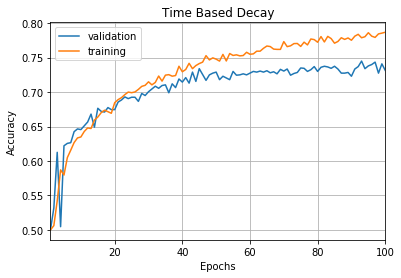

In [25]:
plot('time based decay', tbd_history)

#### Step decay

Define SGD optimizer

In [26]:
momentum = 0.5

In [27]:
sgd = SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False)

Build the CNN model

In [28]:
sd_model = build_cnn(sgd)

Define step decay function

In [29]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
    
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr: {}'.format(step_decay(len(self.losses))))

In [30]:
def step_decay(epoch):
    initial_lr = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lr = initial_lr * math.pow(drop, math.floor(epoch/epochs_drop))
    return lr

Learn schedule callback

In [31]:
loss_history = LossHistory()
lr = LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lr]

Fit the model

In [32]:
sd_history = sd_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_data=(X_test, y_test), callbacks=callbacks_list)

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
 - 2s - loss: 0.6932 - acc: 0.5128 - val_loss: 0.6908 - val_acc: 0.5170
lr: 0.1
Epoch 2/100
 - 2s - loss: 0.6851 - acc: 0.5541 - val_loss: 0.6636 - val_acc: 0.6055
lr: 0.1
Epoch 3/100
 - 2s - loss: 0.6725 - acc: 0.5833 - val_loss: 0.6583 - val_acc: 0.6020
lr: 0.1
Epoch 4/100
 - 2s - loss: 0.6649 - acc: 0.5902 - val_loss: 0.6559 - val_acc: 0.6170
lr: 0.1
Epoch 5/100
 - 2s - loss: 0.6576 - acc: 0.6099 - val_loss: 0.6458 - val_acc: 0.6245
lr: 0.1
Epoch 6/100
 - 2s - loss: 0.6492 - acc: 0.6165 - val_loss: 0.6417 - val_acc: 0.6230
lr: 0.1
Epoch 7/100
 - 2s - loss: 0.6340 - acc: 0.6333 - val_loss: 0.6348 - val_acc: 0.6340
lr: 0.1
Epoch 8/100
 - 2s - loss: 0.6297 - acc: 0.6457 - val_loss: 0.6321 - val_acc: 0.6405
lr: 0.1
Epoch 9/100
 - 2s - loss: 0.6209 - acc: 0.6539 - val_loss: 0.6366 - val_acc: 0.6235
lr: 0.1
Epoch 10/100
 - 2s - loss: 0.6144 - acc: 0.6572 - val_loss: 0.6289 - val_acc: 0.6280
lr: 0.05
Epoch 11/100
 - 2s - loss: 0.

lr: 0.000390625
Epoch 86/100
 - 2s - loss: 0.4836 - acc: 0.7568 - val_loss: 0.5788 - val_acc: 0.7000
lr: 0.000390625
Epoch 87/100
 - 2s - loss: 0.4856 - acc: 0.7601 - val_loss: 0.5782 - val_acc: 0.7020
lr: 0.000390625
Epoch 88/100
 - 2s - loss: 0.4851 - acc: 0.7621 - val_loss: 0.5774 - val_acc: 0.7035
lr: 0.000390625
Epoch 89/100
 - 2s - loss: 0.4827 - acc: 0.7652 - val_loss: 0.5778 - val_acc: 0.7005
lr: 0.000390625
Epoch 90/100
 - 2s - loss: 0.4881 - acc: 0.7579 - val_loss: 0.5776 - val_acc: 0.7010
lr: 0.0001953125
Epoch 91/100
 - 2s - loss: 0.4826 - acc: 0.7618 - val_loss: 0.5778 - val_acc: 0.7010
lr: 0.0001953125
Epoch 92/100
 - 2s - loss: 0.4850 - acc: 0.7589 - val_loss: 0.5775 - val_acc: 0.7000
lr: 0.0001953125
Epoch 93/100
 - 2s - loss: 0.4907 - acc: 0.7570 - val_loss: 0.5773 - val_acc: 0.7000
lr: 0.0001953125
Epoch 94/100
 - 2s - loss: 0.4799 - acc: 0.7602 - val_loss: 0.5777 - val_acc: 0.7005
lr: 0.0001953125
Epoch 95/100
 - 2s - loss: 0.4856 - acc: 0.7600 - val_loss: 0.5776 - v

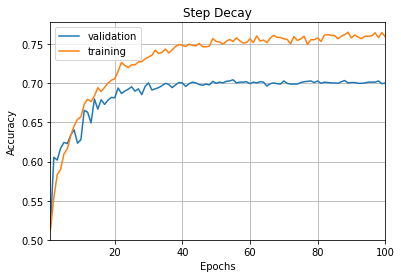

In [33]:
plot('step decay', sd_history)

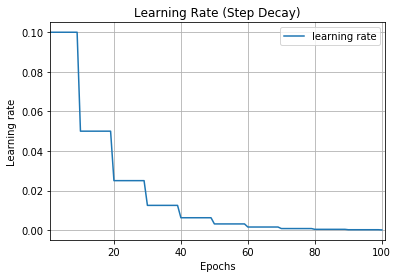

In [34]:
plot_lr('step decay', loss_history)